# KMeans Clustering With Water Data
---
In this notebook, we will delve into various aspects of water supply and usage, examining their relationships and identifying patterns through KMeans and DBSCAN clustering. By applying clustering algorithms, we can gain insights into the complex interplay between different water-related factors and uncover distinct clusters within the dataset. Through variable exploration and visualization, we can identify important trends and patterns in water usage, ultimately contributing to a deeper understanding of how communities, industries, policy makers, and individuals can better preserve this resource and offset climate-related impacts.

# Contents
- [I. Import Libraries](#I.-Import-Libraries)
- [II. Load Data](#II.-Load-Data)
- [III. Models](#III.-Models)
  - [Water Supply](#Water-Supply)
    - [K-Means](#K-Means)
      - [Find The Best K (Inertia)](#Find-The-Best-K-(Inertia))
      - [Find The Best K (Silhouette)](#Find-The-Best-K-(Silhouette))
      - [Cluster Predictions](#Cluster-Predictions)
      - [Centroids](#Centroids)
      - [Visualize Cluster Labels](#Visualize-Cluster-Labels)
      - [Create Colormaps](#Create-Colormaps)
    - [DBSCAN](#DBSCAN)
      - [Brute Force Parameters](#Brute-Force-Parameters)
      - [Create Plot](#Create-Plot)
  - [Water Consumption](#Water-Consumption)
    - [K-Means](#K-Means)
      - [Find The Best K (Inertia)](#Find-The-Best-K-(Inertia))
      - [Find The Best K (Silhouette)](#Find-The-Best-K-(Silhouette))
      - [Cluster Predictions](#Cluster-Predictions)
      - [Centroids](#Centroids)
      - [Visualize Cluster Labels](#Visualize-Cluster-Labels)
      - [Create Colormaps](#Create-Colormaps)
    - [DBSCAN](#DBSCAN)
      - [Brute Force Parameters](#Brute-Force-Parameters)
      - [Create Plot](#Create-Plot)
  - [Demographic and Economic Factors](#Demographic-and-Economic-Factors)
    - [K-Means](#K-Means)
      - [Find The Best K (Inertia)](#Find-The-Best-K-(Inertia))
      - [Find The Best K (Silhouette)](#Find-The-Best-K-(Silhouette))
      - [Cluster Predictions](#Cluster-Predictions)
      - [Centroids](#Centroids)
      - [Visualize Cluster Labels](#Visualize-Cluster-Labels)
      - [Create Colormaps](#Create-Colormaps)
    - [DBSCAN](#DBSCAN)
      - [Brute Force Parameters](#Brute-Force-Parameters)
      - [Create Plot](#Create-Plot)
  - [Climate Factors](#Climate-Factors)
    - [K-Means](#K-Means)
      - [Find The Best K (Inertia)](#Find-The-Best-K-(Inertia))
      - [Find The Best K (Silhouette)](#Find-The-Best-K-(Silhouette))
      - [Cluster Predictions](#Cluster-Predictions)
      - [Centroids](#Centroids)
      - [Visualize Cluster Labels](#Visualize-Cluster-Labels)
      - [Create Colormaps](#Create-Colormaps)
    - [DBSCAN](#DBSCAN)
      - [Brute Force Parameters](#Brute-Force-Parameters)
      - [Create Plot](#Create-Plot)
  - [Integrated Water and Socio-Economic Climate](#Integrated-Water-and-Socio-Economic-Climate)
    - [K-Means](#K-Means)
      - [Find The Best K (Inertia)](#Find-The-Best-K-(Inertia))
      - [Find The Best K (Silhouette)](#Find-The-Best-K-(Silhouette))
      - [Cluster Predictions](#Cluster-Predictions)
      - [Centroids](#Centroids)
      - [Visualize Cluster Labels](#Visualize-Cluster-Labels)
      - [Create Colormaps](#Create-Colormaps)
    - [DBSCAN](#DBSCAN)
      - [Brute Force Parameters](#Brute-Force-Parameters)
      - [Create Plot](#Create-Plot)
---

# I. Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

matplotlib.style.use('ggplot')

# from google.colab import drive
# drive.mount('/content/drive')

import os

os.environ["threadpoolctl._detect_openblas"] = "False"

# II. Load Data

In [32]:
df = pd.read_csv('../../data/clean-data/combined2.csv')

# III. Models

## Water Supply

In [33]:
# Create DataFrame
df1 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'fips'])
df1.head()

,ps_gwpop,ps_swpop,ps_topop,fips
0,9.446,1.9,11.346,23029
1,10.497,0.0,10.497,13191
2,10.497,0.0,10.497,13191
3,10.497,0.0,10.497,13191
4,10.497,0.0,10.497,13191


### KMeans

In [34]:
# Define X
X = df1[['ps_gwpop', 'ps_swpop', 'ps_topop']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km1 = KMeans(n_clusters=50, n_init='auto', random_state=42)
km1.fit(X_scaled)

KMeans(n_clusters=50, n_init='auto', random_state=42)

#### Find the best K (Inertia)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

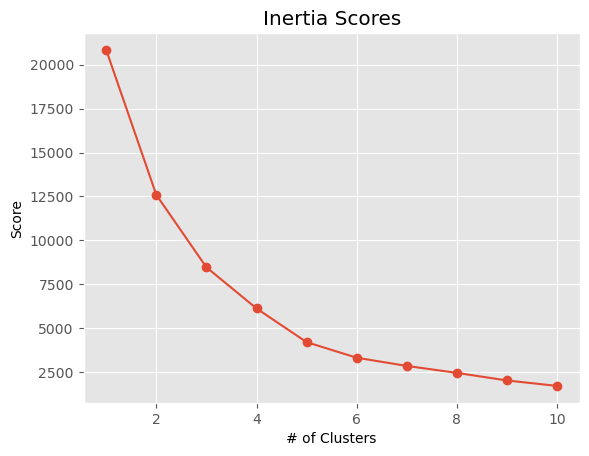

In [35]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

#### Find The Best K (Silhouette)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

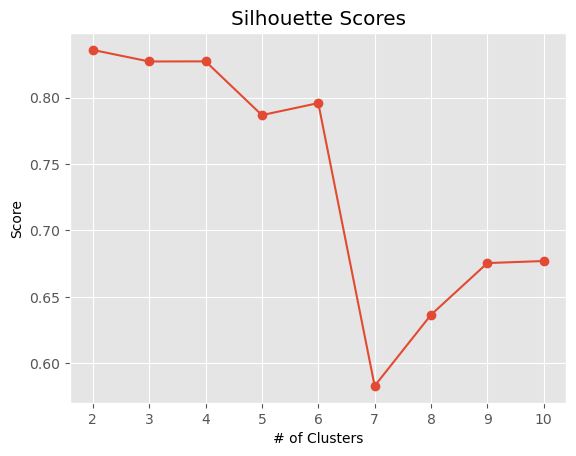

In [36]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Cluster Predictions

In [37]:
# Class attributes
km1.labels_

array([12, 12, 12, ..., 47, 33, 33])

In [38]:
# Predict
km1.predict(X_scaled)

array([12, 12, 12, ..., 47, 33, 33])

In [39]:
# Attach predicted cluster to original points
df1['cluster'] = km1.labels_
df1.head()

,ps_gwpop,ps_swpop,ps_topop,fips,cluster
0,9.446,1.9,11.346,23029,12
1,10.497,0.0,10.497,13191,12
2,10.497,0.0,10.497,13191,12
3,10.497,0.0,10.497,13191,12
4,10.497,0.0,10.497,13191,12


#### Centroids

In [40]:
# Unscale to create centroids
centroids = sc.inverse_transform(km1.cluster_centers_)

#### Visualize Cluster Labels

In [41]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_gwpop', 'ps_swpop', 'ps_topop']
)

#### Create Colormaps

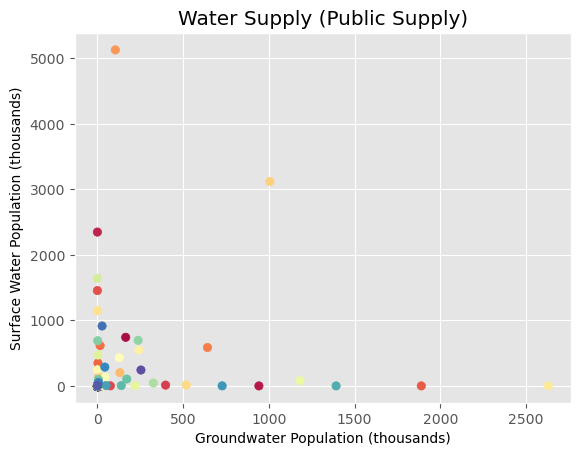

In [42]:
# Create a colormap
cluster_labels = km1.labels_
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (50)
colors = []
for i in range(num_clusters):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km1.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors)

# Labels
plt.title('Water Supply (Public Supply)')
plt.xlabel('Groundwater Population (thousands)')
plt.ylabel('Surface Water Population (thousands)')

# Save plot
# plt.savefig('50_water_supply.png', format='png')

# Show the plot
plt.show();

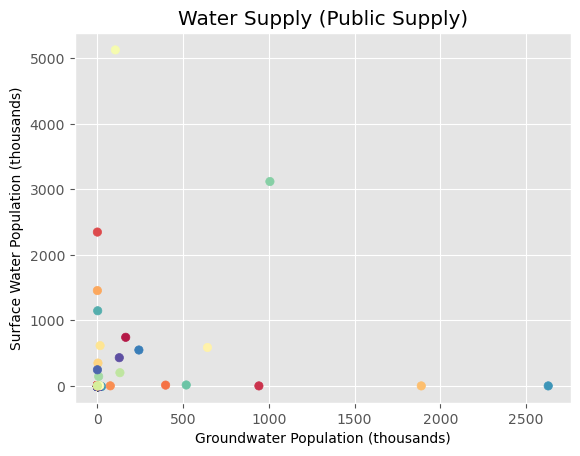

In [43]:
# Create a colormap
cluster_labels = km1.labels_
num_clusters = 25
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (25)
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km1.cluster_centers_)
plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors,)

# Labels
plt.title('Water Supply (Public Supply)')
plt.xlabel('Groundwater Population (thousands)')
plt.ylabel('Surface Water Population (thousands)')

# Save plot
# plt.savefig('25_water_supply.png', format='png')

# Show the plot
plt.show();

## Water Supply

In [44]:
# Create DataFrame
df2 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'fips'])
df2.head()

,ps_gwpop,ps_swpop,ps_topop,fips
0,9.446,1.9,11.346,23029
1,10.497,0.0,10.497,13191
2,10.497,0.0,10.497,13191
3,10.497,0.0,10.497,13191
4,10.497,0.0,10.497,13191


### DBSCAN

In [45]:
# Create X and scale it
X = df2[['ps_gwpop', 'ps_swpop', 'ps_topop']]
Z = StandardScaler().fit_transform(X)

#### Brute Force Parameters

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#        if lbls.nunique() <= 1:
#            continue
#
#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [46]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

#### Create Plot

0.7531661648279157

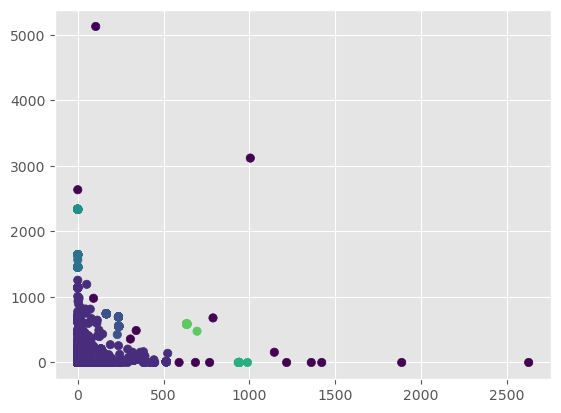

In [47]:
# Instantiate DBSCAN and plot values
db = DBSCAN(eps=0.67, min_samples=8)
db.fit(Z)
plt.scatter(X.ps_gwpop, X.ps_swpop, c=db.labels_)
metrics.silhouette_score(Z, db.labels_)

## Water Consumption

In [48]:
df3 = pd.DataFrame(df, columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl', 'fips'])
df3.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips
0,1.38,0.19,1.57,23029
1,1.04,0.00,1.04,13191
2,1.04,0.00,1.04,13191
3,1.04,0.00,1.04,13191
4,1.04,0.00,1.04,13191


### KMeans

In [49]:
# Define X
X = df3[['ps_wgwto', 'ps_wswto', 'ps_wtotl']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km2 = KMeans(n_clusters=50, n_init='auto', random_state=42)
km2.fit(X_scaled)

KMeans(n_clusters=50, n_init='auto', random_state=42)

#### Find The Best K (Inertia)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

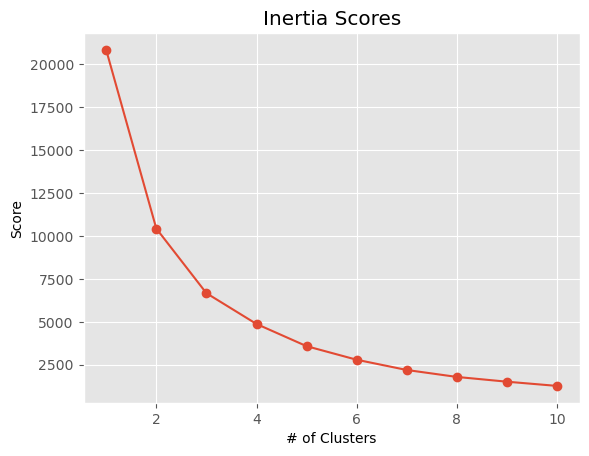

In [50]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

#### Find The Best K (Silhouette)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

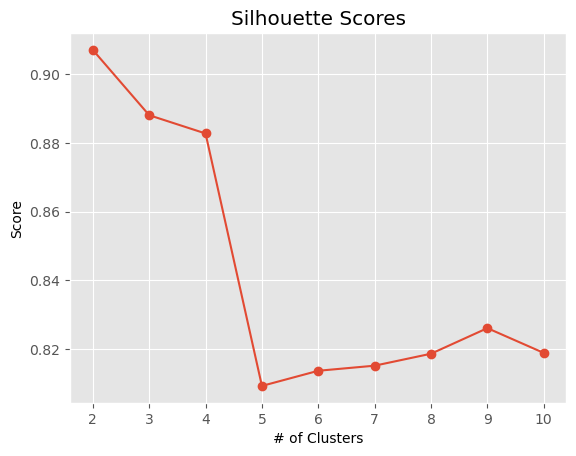

In [51]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Cluster Predictions

In [52]:
# Class attributes
km2.labels_

array([44,  6,  6, ...,  6, 44, 44])

In [53]:
# Predict
km2.predict(X_scaled)

array([44,  6,  6, ...,  6, 44, 44])

In [54]:
# Attach predicted cluster to original points
df3['cluster'] = km2.labels_
df3.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips,cluster
0,1.38,0.19,1.57,23029,44
1,1.04,0.00,1.04,13191,6
2,1.04,0.00,1.04,13191,6
3,1.04,0.00,1.04,13191,6
4,1.04,0.00,1.04,13191,6


#### Centroids

In [55]:
# Unscale to create centroids
centroids = sc.inverse_transform(km2.cluster_centers_)

#### Visualize Cluster Labels

In [56]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl']
)

#### Create Colormaps

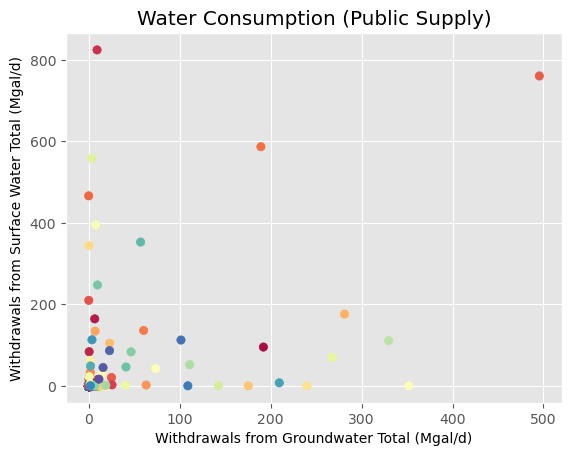

In [57]:
# Create a colormap
cluster_labels = km2.labels_
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (50)
colors = []
for i in range(num_clusters):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km2.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors)

# Labels
plt.title('Water Consumption (Public Supply)')
plt.xlabel('Withdrawals from Groundwater Total (Mgal/d)')
plt.ylabel('Withdrawals from Surface Water Total (Mgal/d)')

# Save plot
# plt.savefig('50_water_consumption.png', format='png')

# Show the plot
plt.show();

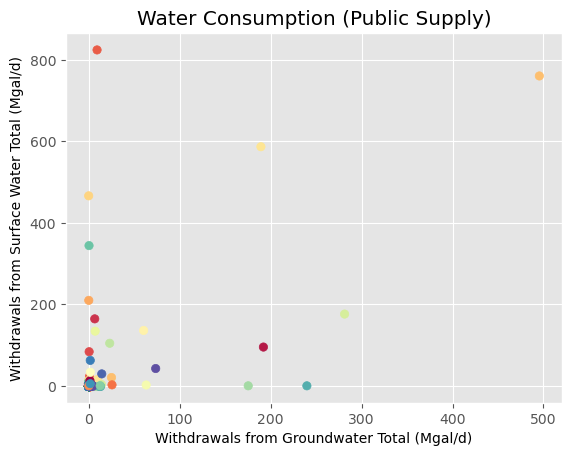

In [58]:
# Create a colormap
cluster_labels = km2.labels_
num_clusters = 25
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (25)
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km2.cluster_centers_)
plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors,)

# Labels
plt.title('Water Consumption (Public Supply)')
plt.xlabel('Withdrawals from Groundwater Total (Mgal/d)')
plt.ylabel('Withdrawals from Surface Water Total (Mgal/d)')

# Save plot
# plt.savefig('25_water_consumption.png', format='png')

# Show the plot
plt.show();

## Water Consumption

In [59]:
# Create DataFrame
df4 = pd.DataFrame(df, columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl', 'fips'])
df4.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips
0,1.38,0.19,1.57,23029
1,1.04,0.00,1.04,13191
2,1.04,0.00,1.04,13191
3,1.04,0.00,1.04,13191
4,1.04,0.00,1.04,13191


### DBSCAN

In [60]:
# Create X and scale it
X = df4[['ps_wgwto', 'ps_wswto', 'ps_wtotl']]
Z = StandardScaler().fit_transform(X)

#### Brute Force Parameters

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#        if lbls.nunique() <= 1:
#            continue

#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [61]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

#### Create Plot

0.8605480546809164

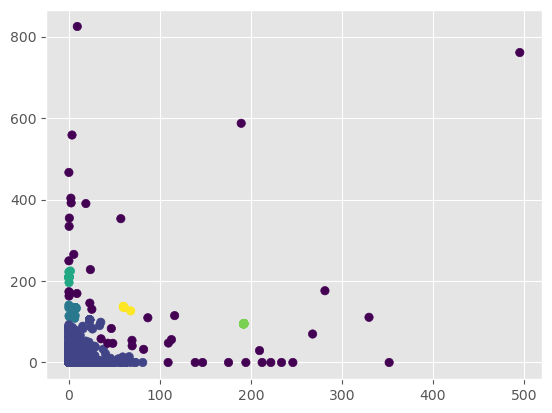

In [62]:
# Instantiate DBSCAN and plot values
db2 = DBSCAN(eps=0.69, min_samples=6)
db2.fit(Z)
plt.scatter(X.ps_wgwto, X.ps_wswto, c=db2.labels_)
metrics.silhouette_score(Z, db2.labels_)

## Demographic and Economic Factors

In [63]:
df5 = pd.DataFrame(df, columns=['population', 'median_household_income', 'fips'])
df5.head()

,population,median_household_income,fips
0,32191.0,38083.0,23029
1,14007.0,42988.0,13191
2,14007.0,42988.0,13191
3,14007.0,42988.0,13191
4,14007.0,42988.0,13191


### KMeans

In [64]:
# Define X
X = df5[['population', 'median_household_income']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km3 = KMeans(n_clusters=50, n_init='auto', random_state=42)
km3.fit(X_scaled)

KMeans(n_clusters=50, n_init='auto', random_state=42)

#### Find the best K (Inertia)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

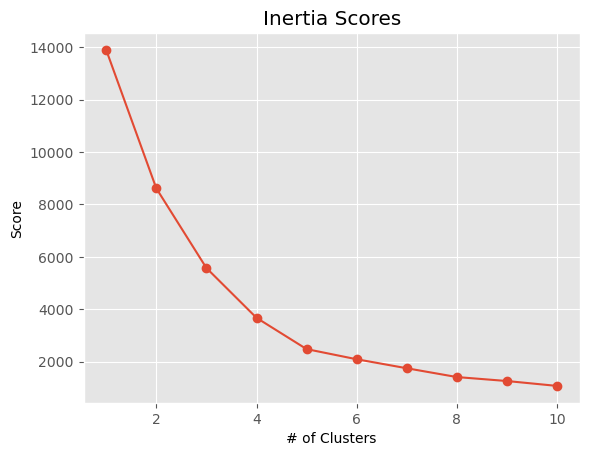

In [65]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

#### Find the best K (Silhouette)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

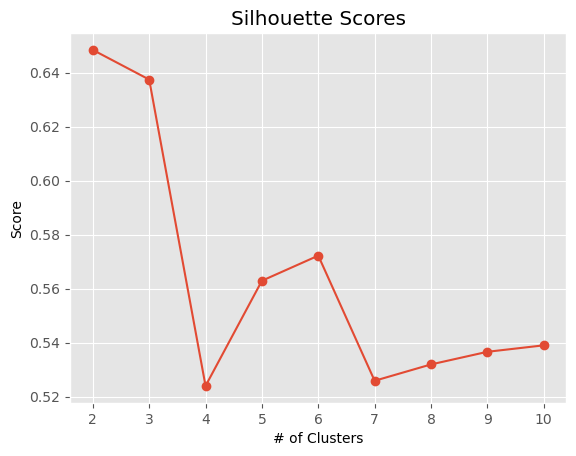

In [66]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Cluster Predictions

In [67]:
# Class attributes
km3.labels_

array([11, 22, 22, ..., 48, 42, 42])

In [68]:
# Predict
km3.predict(X_scaled)

array([11, 22, 22, ..., 48, 42, 42])

In [69]:
# Attach predicted cluster to original points
df5['cluster'] = km3.labels_
df5.head()

,population,median_household_income,fips,cluster
0,32191.0,38083.0,23029,11
1,14007.0,42988.0,13191,22
2,14007.0,42988.0,13191,22
3,14007.0,42988.0,13191,22
4,14007.0,42988.0,13191,22


#### Centroids

In [70]:
# Unscale to create centroids
centroids = sc.inverse_transform(km3.cluster_centers_)

#### Visualize Cluster Labels

In [71]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['population', 'median_household_income']
)

#### Create Colormaps

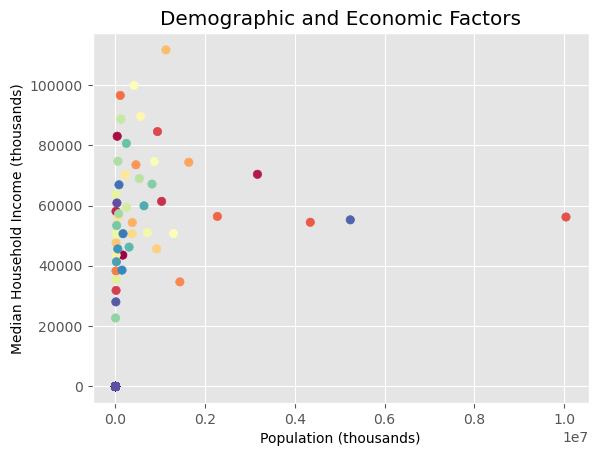

In [72]:
# Create a colormap
cluster_labels = km3.labels_
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (50)
colors = []
for i in range(num_clusters):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km3.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors)

# Labels
plt.title('Demographic and Economic Factors')
plt.xlabel('Population (thousands)')
plt.ylabel('Median Household Income (thousands)')

# Save plot
# plt.savefig('50_demographic_economic_factors.png', format='png')

# Show the plot
plt.show();

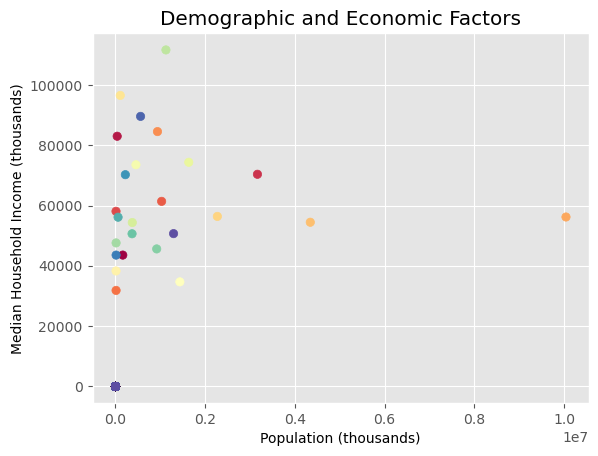

In [73]:
# Create a colormap
cluster_labels = km3.labels_
num_clusters = 25
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (25)
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km3.cluster_centers_)
plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors,)

# Labels
plt.title('Demographic and Economic Factors')
plt.xlabel('Population (thousands)')
plt.ylabel('Median Household Income (thousands)')

# Save plot
# plt.savefig('25_demographic_economic_factors.png', format='png')

# Show the plot
plt.show();

## Demographic and Economic Factors

In [74]:
# Create DataFrame
df6 = pd.DataFrame(df, columns=['population', 'median_household_income', 'fips'])
df6.head()

,population,median_household_income,fips
0,32191.0,38083.0,23029
1,14007.0,42988.0,13191
2,14007.0,42988.0,13191
3,14007.0,42988.0,13191
4,14007.0,42988.0,13191


### DBSCAN

In [75]:
# Create X and scale it
X = df6[['population', 'median_household_income']]
Z = StandardScaler().fit_transform(X)

#### Bruce Force Parameters

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#       if lbls.nunique() <= 1:
#            continue

#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [76]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

#### Create Plot

0.6094011880843374

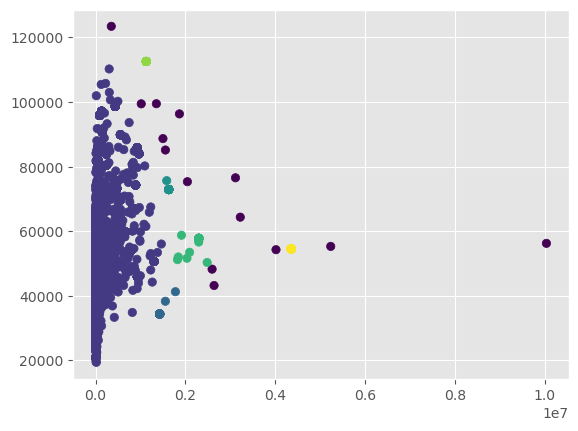

In [77]:
# Instantiate DBSCAN and plot values
db3 = DBSCAN(eps=0.63, min_samples=8)
db3.fit(Z)
plt.scatter(X.population, X.median_household_income, c=db3.labels_)
metrics.silhouette_score(Z, db3.labels_)

## Climate Factors

In [78]:
df7 = pd.DataFrame(df, columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df7.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
3,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
4,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191


### KMeans

In [79]:
# Define X
X = df7[['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km4 = KMeans(n_clusters=50, n_init='auto', random_state=42)
km4.fit(X_scaled)

KMeans(n_clusters=50, n_init='auto', random_state=42)

#### Find the best K (Inertia)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

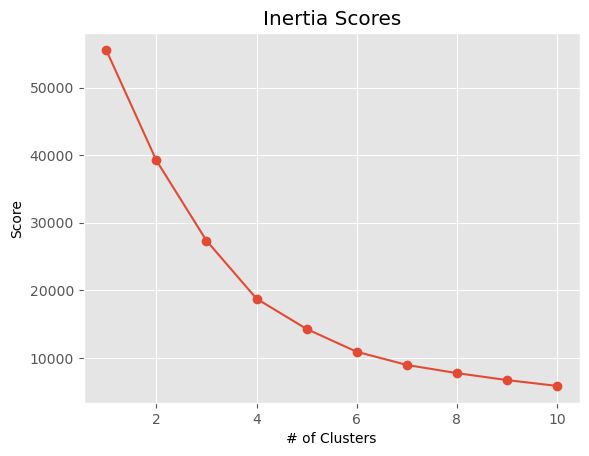

In [80]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

#### Find the best K (Silhouette)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

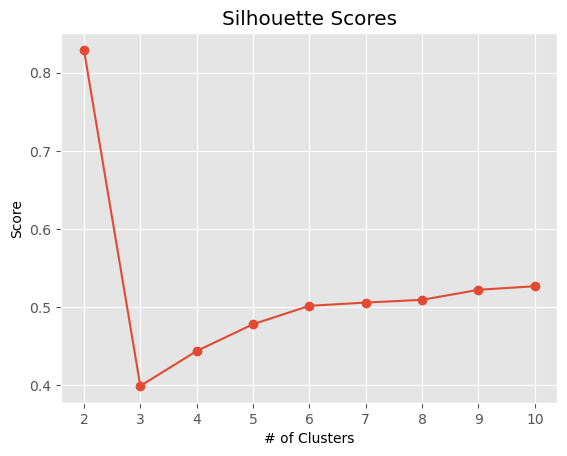

In [81]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Cluster Predictions

In [82]:
# Class attributes
km4.labels_

array([21, 25, 25, ..., 24, 48, 39])

In [83]:
# Predict
km4.predict(X_scaled)

array([21, 25, 25, ..., 24, 48, 39])

In [84]:
# Attach predicted cluster to original points
df7['cluster'] = km4.labels_
df7.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips,cluster
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029,21
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,25
2,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,25
3,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,25
4,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,25


#### Centroids

In [85]:
# Unscale to create centroids
centroids = sc.inverse_transform(km4.cluster_centers_)

#### Visualize Cluster Labels

In [86]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']
)

#### Create Colormaps

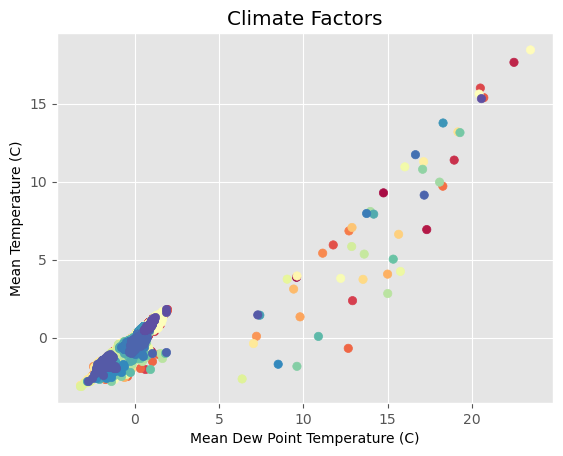

In [87]:
# Create a colormap
cluster_labels = km4.labels_
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (50)
colors = []
for i in range(num_clusters):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km4.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors)

# Labels
plt.title('Climate Factors')
plt.xlabel('Mean Dew Point Temperature (C)')
plt.ylabel('Mean Temperature (C)')

# Save plot
# plt.savefig('50_climate_factors.png', format='png')

# Show the plot
plt.show();

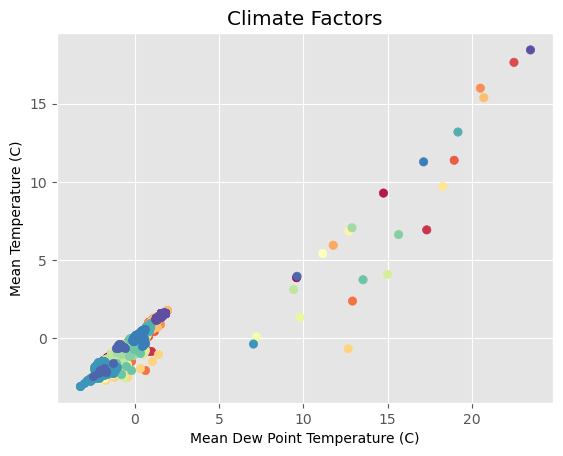

In [88]:
# Create a colormap
cluster_labels = km4.labels_
num_clusters = 25
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (25)
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km4.cluster_centers_)
plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors,)

# Labels
plt.title('Climate Factors')
plt.xlabel('Mean Dew Point Temperature (C)')
plt.ylabel('Mean Temperature (C)')

# Save plot
# plt.savefig('25_climate_factors.png', format='png')

# Show the plot
plt.show();

## Climate Factors

In [89]:
# Create DataFrame
df8 = pd.DataFrame(df, columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df8.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
3,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
4,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191


### DBSCAN

In [90]:
# Create X and scale it
X = df8[['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]
Z = StandardScaler().fit_transform(X)

#### Bruce Force Parameters

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#        if lbls.nunique() <= 1:
#            continue

#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [91]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

#### Create Plot

0.271422350047858

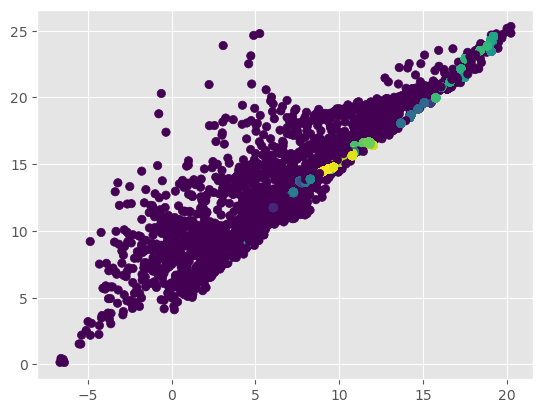

In [92]:
# Instantiate DBSCAN and plot values
db4 = DBSCAN(eps=0.01, min_samples=4)
db4.fit(Z)
plt.scatter(X.tdmean_c, X.tmean_c, c=db4.labels_)
metrics.silhouette_score(Z, db4.labels_)

## Integrated Water and Socio-Economic Climate

In [107]:
df9 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df9.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,9.446,1.9,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
3,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
4,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191


### KMeans

In [108]:
# Define X
X = df9[['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km5 = KMeans(n_clusters=50, n_init='auto', random_state=42)
km5.fit(X_scaled)

KMeans(n_clusters=50, n_init='auto', random_state=42)

#### Find the best K (Inertia)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

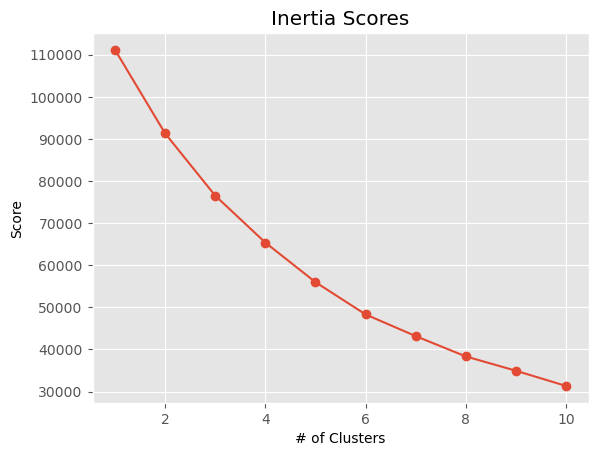

In [109]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

#### Find the best K (Silhouette)

C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Crypt\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

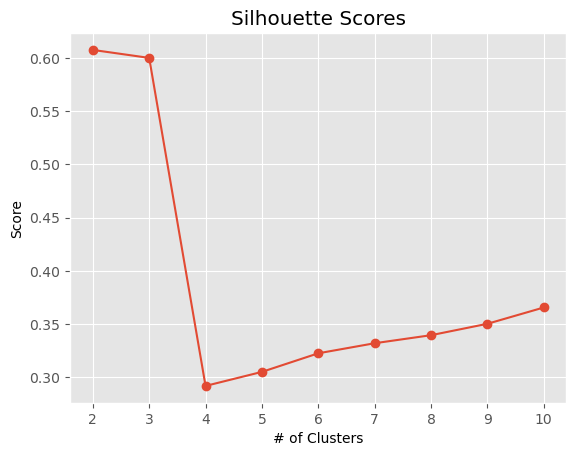

In [110]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Cluster Predictions

In [111]:
# Class attributes
km5.labels_

array([42, 11, 11, ..., 11, 42, 35])

In [112]:
# Predict
km5.predict(X_scaled)

array([42, 11, 11, ..., 11, 42, 35])

In [113]:
# Attach predicted cluster to original points
df9['cluster'] = km5.labels_
df9.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips,cluster
0,9.446,1.9,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029,42
1,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,11
2,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,11
3,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,11
4,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,11


#### Centroids

In [114]:
# Unscale to create centroids
centroids = sc.inverse_transform(km5.cluster_centers_)

#### Visualize Cluster Labels

In [115]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']
)

#### Create Colormaps

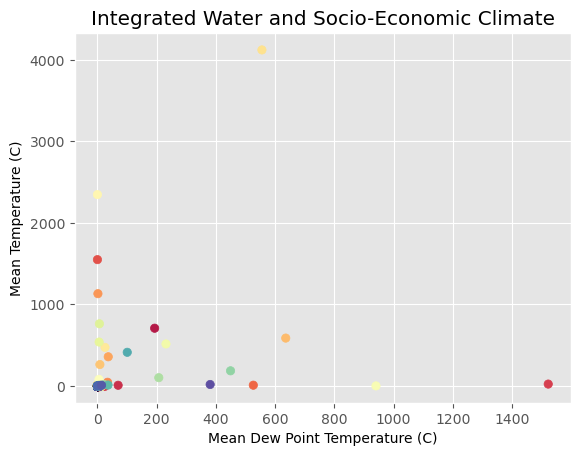

In [116]:
# Create a colormap
cluster_labels = km5.labels_
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (50)
colors = []
for i in range(num_clusters):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km5.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors)

# Labels
plt.title('Integrated Water and Socio-Economic Climate')
plt.xlabel('Mean Dew Point Temperature (C)')
plt.ylabel('Mean Temperature (C)')

# Save plot
# plt.savefig('50_integrated_water_and_socioeconomic_climate.png', format='png')

# Show the plot
plt.show();

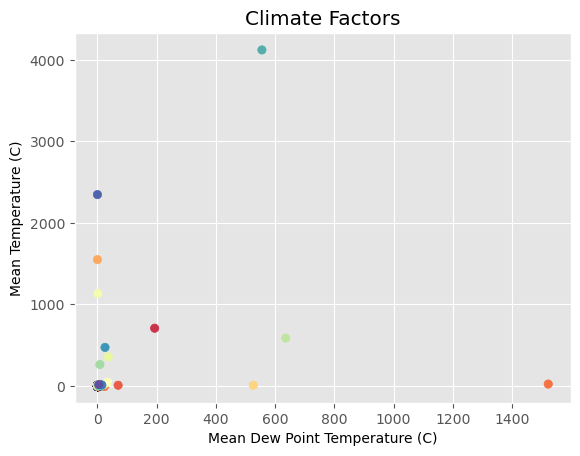

In [117]:
# Create a colormap
cluster_labels = km5.labels_
num_clusters = 25
colormap = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

# Map colors for different clusters (25)
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km5.cluster_centers_)
plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors,)

# Labels
plt.title('Climate Factors')
plt.xlabel('Mean Dew Point Temperature (C)')
plt.ylabel('Mean Temperature (C)')

# Save plot
# plt.savefig('25_climate_factors.png', format='png')

# Show the plot
plt.show();

## Integrated Water and Socio-Economic Climate

In [118]:
# Create DataFrame
df10 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df10.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,9.446,1.9,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
3,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
4,10.497,0.0,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191


### DBSCAN

In [119]:
# Create X and scale it
X = df10[['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]
Z = StandardScaler().fit_transform(X)

#### Brute Force Parameters

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#        if lbls.nunique() <= 1:
#            continue

#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

#### Create Plot

0.20632502840553185

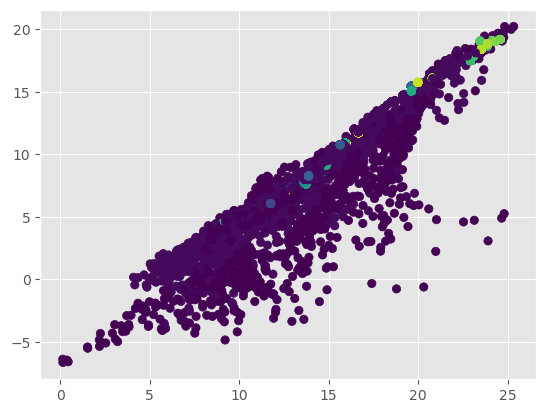

In [120]:
# Instantiate DBSCAN and plot values
db5 = DBSCAN(eps=0.7, min_samples=13)
db5.fit(Z)
plt.scatter(X.tmean_c, X.tdmean_c, c=db5.labels_)
metrics.silhouette_score(Z, db5.labels_)